# $\Psi$ Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Bayesian Update $p(\theta|d) = \frac{p(\theta)*p(d|\theta)}{p(d)}$

In this case, we want to estimate parameters $\theta$ of a psychometric curve from experimental data $d$. Posterior probability can be obtained with Bayes theorem. The 3 values to the right of the equals are:<br><br>
    - Prior $p(\theta)$, we can hypothesize as uniform, as a general case.<br>
    - Likelihood $p(d|\theta)$, obtained directly with our model of the psychometric function $\psi$ (ex sigmoid)<br>
    - Probability of the data $p(d)$, at the denominator, can be computed as marginal probability: $\sum_{\theta}p(\theta)*p(d|\theta)$<br>   
In fact, the method consists only of calculating the likelihood and, then, updating the $\theta$ tiral parameter distribution by trial, based on the responses we collect during the experiment

In [2]:
def sigmoid(x,th,b=3):
    
    # x   stimulus intensity
    # th  threshold
    # b   slope
    
    y = 1/(1+np.exp(-b*(x-th)))
    
    return y

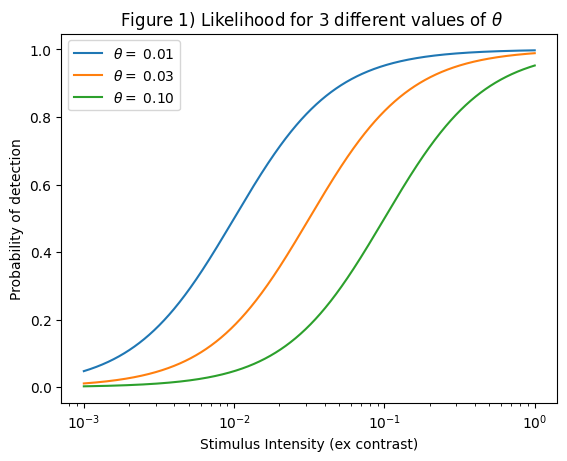

In [3]:
x = np.linspace(-3,0,1000) # log values
th = [-2, -1.5, -1]

y1 = sigmoid(x,th[0])
y2 = sigmoid(x,th[1])
y3 = sigmoid(x,th[2])

plt.semilogx(10**x,y1, label = fr'$\theta =$ {10**th[0]:.2f}')
plt.semilogx(10**x,y2, label = fr'$\theta =$ {10**th[1]:.2f}')
plt.semilogx(10**x,y3, label = fr'$\theta =$ {10**th[2]:.2f}')
plt.legend()
plt.xlabel('Stimulus Intensity (ex contrast)')
plt.ylabel('Probability of detection')
plt.title(r' Figure 1) Likelihood for 3 different values of $\theta$')
plt.show()

The likelihood, in fact, consists of the probability of having a response to the stimulus according to the parameters of the curve we want to estimate, such as a sigmoid

## 2) Information and entropy

Information is defined as $I(p) = -log(p)$

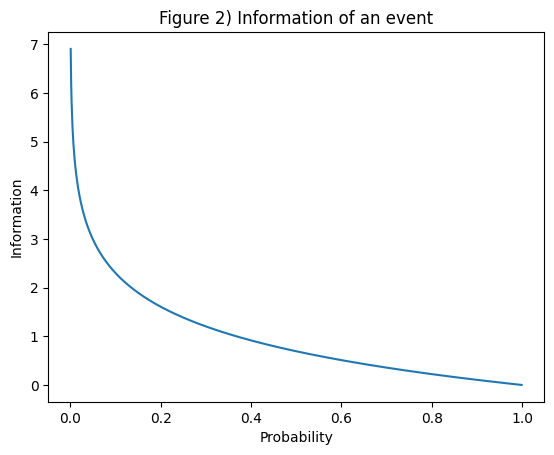

In [4]:
p = np.linspace(0.001,0.999,1000)
I = -np.log(p)

plt.plot(p,I)
plt.xlabel('Probability')
plt.ylabel('Information')
plt.title('Figure 2) Information of an event')
plt.show()

Entropy is defined as the weighted average of the information of a probability $H(p) =\sum_{p}p*I(p) = - \sum_{p} p*log(p)$

In the case of a binary event, the entropy of both possible outcomes is as follows:

In [5]:
p_success = 1/2
p_failure = 1 - p_success

H_success = -(p_success*np.log(p_success))
H_failure = -(p_failure*np.log(p_failure))

print(f'Entropy of heads = {H_success},\nEntropy of tails = {H_failure}')

Entropy of heads = 0.34657359027997264,
Entropy of tails = 0.34657359027997264


In a binary distribution, entropy is the sum of the entropies of the two events. It's greatest when the two events both have a 50% chance of occurring. The information contained in a certain event is, in fact, zero

In [7]:
def entropy(p):
    
    H = -p*np.log(p)
    
    return H

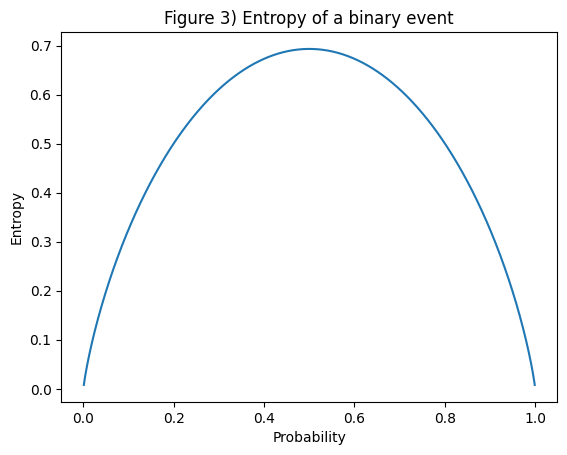

In [8]:
H_success = entropy(p)
H_failure = entropy(1-p)
H = H_success + H_failure

plt.plot(p,H)
plt.xlabel('Probability')
plt.ylabel('Entropy')
plt.title('Figure 3) Entropy of a binary event')
plt.show()

Extending to psychometrics, a subject's response to a stimulus is binary (success/failure) in the case of forced choices, but this can also be extended to different tasks. In the case of SOAs, binary consists of the choice between Sync and Async.
The most informative stimulus is the one closest to the threshold since, generally, it is defined as the one that is perceived 50% of the time

Taking Figure 1, we can analyze the entropy of each of the 3 psychometric curves as the stimulus intensity varies

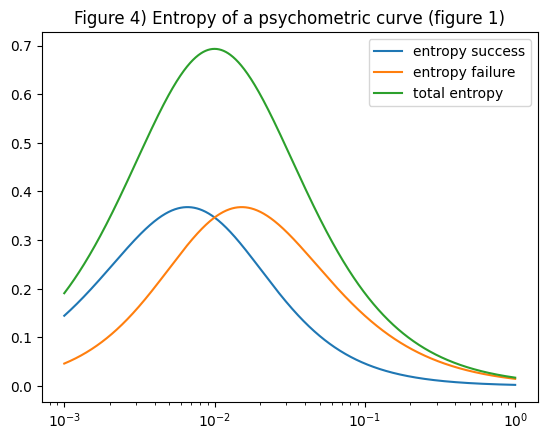

In [9]:
H1_success, H1_failure = entropy(y1), entropy(1-y1)
H1 = H1_success + H1_failure

plt.semilogx(10**x,H1_success,label='entropy success')
plt.semilogx(10**x,H1_failure,label='entropy failure')
plt.semilogx(10**x,H1,label='total entropy')
plt.legend()
plt.title('Figure 4) Entropy of a psychometric curve (figure 1)')
plt.show()

To show that entropy is maximum at the threshold, we compare the true threshold (th[0]) with the value of the stimulus intensity (x) for which entropy is maximum (argmax(H)). Consequently, this is a good approach for choosing the new stimulus to show, since it will be close to the threshold

In [10]:
print(x[np.argmax(H1)]==th[0])

True


Since the value of the threshold is unknown, one will have to compare all entropies as the parameters change (in this case only the threshold). To do this, it is sufficient to sum the H($\theta$), since they can be considered statistically independent

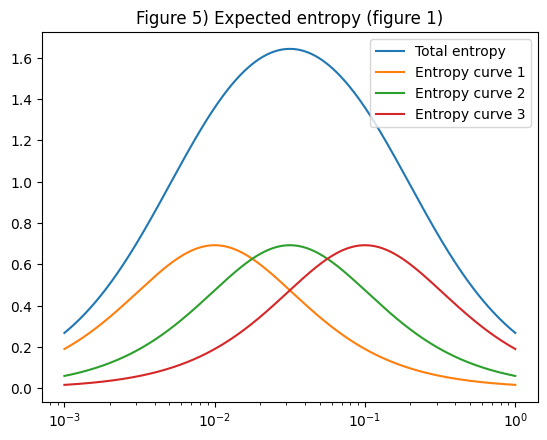

In [11]:
H2_success, H2_failure = entropy(y2), entropy(1-y2)
H3_success, H3_failure = entropy(y3), entropy(1-y3)

H2, H3 = H2_success+H2_failure, H3_success+H3_failure
H = H1+H2+H3

plt.semilogx(10**x,H,label='Total entropy')
plt.semilogx(10**x,H1,label='Entropy curve 1')
plt.semilogx(10**x,H2,label='Entropy curve 2')
plt.semilogx(10**x,H3,label='Entropy curve 3')
plt.legend()
plt.title('Figure 5) Expected entropy (figure 1)')
plt.show()

The most informative stimulus is chosen, therefore, based on the value that maximizes entropy

In [12]:
print(f'Stimulus intensity for the next trial, x = {10**x[np.argmax(H)]}')

Stimulus intensity for the next trial, x = 0.03151363484866479


Gathering the observer's response to the new stimulus, we assess whether we fall into the success or failure case: <br><br>
    - Success: likelihood $p(d|\theta) = \psi$ <br>
    - Failure: likelihood $p(d|\theta) = 1-\psi$ <br><br>
This is calculated for all possible $\theta$. The prior, on the first trial, is uniform, and the probability of the data is a normalization factor, equal for all $\theta

## 3) Example of a single trial

Assume a real threshold at x = 0.1 (-1 in log scale), so the true psychometric curve is as follows:

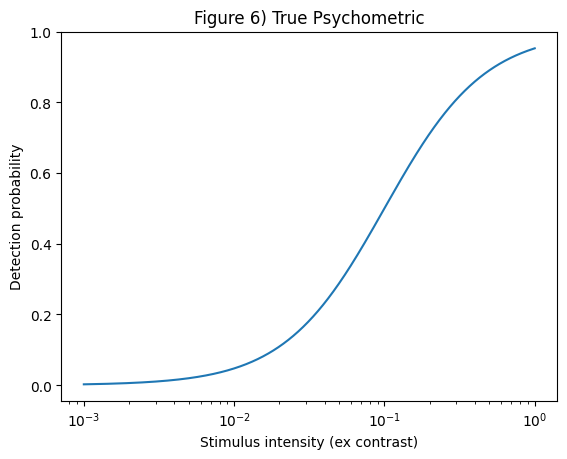

In [13]:
theta_true = -1
y_true = sigmoid(x,theta_true)

plt.semilogx(10**x, y_true)
plt.xlabel('Stimulus intensity (ex contrast)')
plt.ylabel('Detection probability')
plt.title(r'Figure 6) True Psychometric')
plt.show()

Another aspect to consider is the range of $\theta$ to be taken and what type of sampling to do. Generally it is preferable to do a logarithmic one and take as large and dense a range as possible. In this case I consider -2.5 to -0.5 (log scale) with 20 samples.

In [14]:
nT = 20
theta_range = np.linspace(-2.5,-0.5,nT)

In this case we know the true threshold, so we know what the closest threshold is (in the set under consideration)

In [16]:
theta_known = theta_range[np.argmin((theta_range-theta_true)**2)]
print(theta_known)

-1.0263157894736843


We proceed to choose the stimulus to present, maximizing the entropy of all psychometrics. We initialize the uniform prior($\theta$): in the first trial the entropies have the same weight.

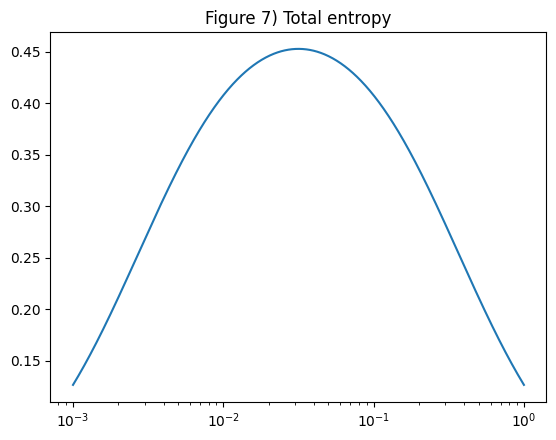

In [17]:
prior = np.ones(nT)/nT
H = 0

for i,theta in enumerate(theta_range):
    
    y = sigmoid(x,theta)
    H += (entropy(y) + entropy(1-y))*prior[i]
    
plt.semilogx(10**x,H)
plt.title('Figure 7) Total entropy')
plt.show()

In [18]:
x_next = x[np.argmax(H)]
print(f'Stimulus intensity for the next trial, x = {10**x_next:.2f}')

Stimulus intensity for the next trial, x = 0.03


Knowing the true threshold, we can calculate the true probability that the stimulus is correctly perceived

In [19]:
p_next_true = sigmoid(x_next,theta_true)
print(f'Probability of the next stimulus being detected = {p_next_true:.2f}')

Probability of the next stimulus being detected = 0.18


I use the random.choice function to determine success(1) or failure(0) given the probability just calculated, in place of a true observer

In [20]:
response = np.random.choice([0, 1], p=[1-p_next_true, p_next_true])

print(response)

0


Based on the response and the stimulus shown, we calculate the likelihood for each $\theta$

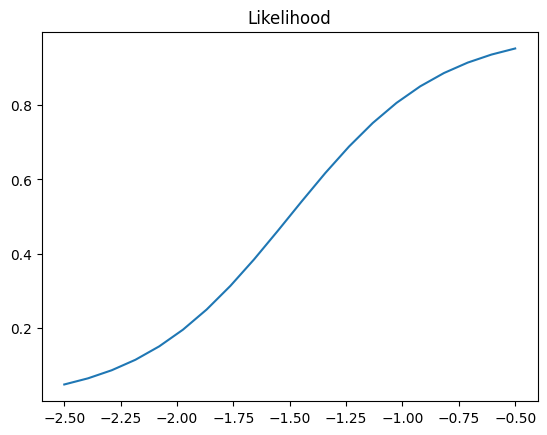

In [153]:
likelihood = np.zeros(nT)

for i, theta in enumerate(theta_range):
    
    psi = sigmoid(x_next,theta)
    
    if response:
        likelihood[i] = psi
    else:
        likelihood[i] = 1-psi
        
plt.plot(theta_range,likelihood)
plt.title('Likelihood')
plt.show()

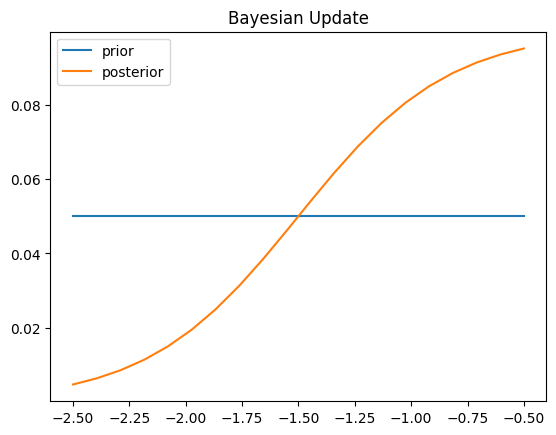

In [158]:
posterior = np.multiply(prior,likelihood)/(sum(np.multiply(prior,likelihood)))

plt.plot(theta_range,prior, label='prior')
plt.plot(theta_range,posterior, label='posterior')
plt.title('Bayesian Update')
plt.legend()
plt.show()